     Sex   Age
1      1  38.0
3      1  35.0
6      0  54.0
10     1   4.0
11     1  58.0
..   ...   ...
871    1  47.0
872    0  33.0
879    1  56.0
887    1  19.0
889    0  26.0

[183 rows x 2 columns]
MinMaxScaler(copy=True, feature_range=(0, 1))
[[1.         0.46889226]
 [1.         0.43095599]
 [0.         0.67121902]
 [1.         0.0389479 ]
 [1.         0.72180071]
 [0.         0.41831057]
 [0.         0.34243804]
 [0.         0.22862924]
 [1.         0.60799191]
 [0.         0.81031866]
 [0.         0.55741022]
 [1.         0.35508346]
 [0.         0.30450177]
 [1.         0.27921093]
 [0.         0.57005564]
 [0.         0.8861912 ]
 [0.         0.27921093]
 [0.         0.25392008]
 [0.         0.58270106]
 [0.         0.29185635]
 [1.         0.39934244]
 [0.         0.67121902]
 [1.         0.22862924]
 [0.         0.45624684]
 [0.         0.29185635]
 [0.         0.44992413]
 [1.         0.2665655 ]
 [0.         0.75973698]
 [0.         0.69650986]
 [1.         0.62063733]


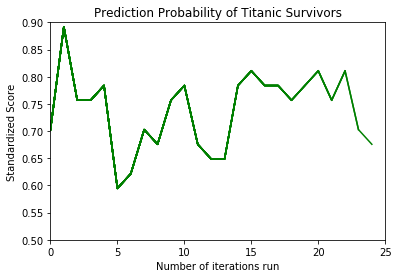

In [5]:
# This project imports the Titanic Training set  (train.csv) from Kaggle, then uses SVM to predict survivors
# The final # presented as mean_score is the probability of knowing who's going to survive based on Age and Sex

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

titanic = pd.read_csv('Dataset_Titanic-kaggle_train.csv') # Importing the data set

titanic = titanic.dropna()
titanic = pd.DataFrame(titanic)

titanic['Sex'] = titanic['Sex'].map({'female': 1, 'male': 0})

data = titanic.iloc[:,4:6]
print(data)
scaler = MinMaxScaler()

print(scaler.fit(data))
print(scaler.transform(data))

target = titanic['Survived']
print(target)

X = data
y = target

svc = svm.SVC(kernel='rbf', C=100, gamma='auto', shrinking = True) # 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

plots = []
i = 1    
fig = plt.figure()
ax = plt.axes()

mean_score = 0

plt.xlim(0, 25)
plt.ylim(.5, .9)
plt.xlabel('Number of iterations run')
plt.ylabel('Standardized Score')
plt.title('Prediction Probability of Titanic Survivors')

for attempts in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    svc.fit(X_train,y_train)
    plots.append(svc.score(X_test,y_test))
    plt.plot(plots,  '-g')
    mean_score = mean_score + svc.score(X_test,y_test)
    i += 1
mean_score = mean_score / (i - 1)    
print()
print("Plots: ")
print(plots)
print()
print('# of iterations: %d       mean_score: %f' %(i - 1, mean_score))
print()
print('So, what this means is the computer can predict with a %f percent reliability whether someone' %(mean_score*100))
print('would survive the Titanic sinking based on Age and Sex alone.')
